In [1]:
import cv2
import numpy as np
import os
import suite2p as s2p
import PIL as pil
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
basedir = "E:\\2P_Data\\TwoTower\\4343702.1\\19_03_2020\\TwoTower_foraging\\TwoTower_foraging_002_002\\suite2p\\plane0\\"

In [3]:
ops = np.load(os.path.join(basedir,'ops.npy'),allow_pickle=True).item()

In [4]:
print(ops.keys())
print(ops['Ly'],ops['Lx'])
print(ops['xrange'],ops['yrange'])

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'preclassify', 'save_mat', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'do_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'pre_smooth', 'spatial_taper', 'roidetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'baseline', 'win_baseline', 'sig_baseline', 'prctile_baseline', 'neucoeff', 'xrange', 'yrange', 'data_path', 'save_path', 'ops_path', 'reg_file', 'meanImg', 'nframes', 'Ly', 'Lx', 'yblock', 'xbloc

In [5]:
mov = s2p.utils.get_frames(ops,np.arange(1000,4000),os.path.join(basedir,"data.bin")).astype(np.float)

In [6]:
print(np.amax(mov),np.amin(mov))

32766.0 -13839.0


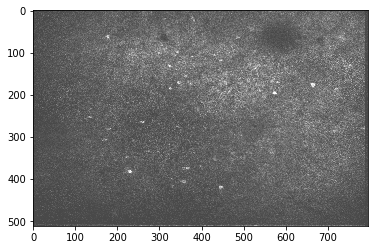

In [7]:
f,ax = plt.subplots()
ax.imshow(mov[100,:,:],cmap='Greys_r')

In [8]:
print(mov.shape)
print(mov.dtype)

(3000, 512, 796)
float64


In [9]:
mov = (mov-np.amin(mov))/(np.amax(mov)-np.amin(mov))

In [10]:
width = 512
height = 512
FPS = 60
fourcc = cv2.VideoWriter_fourcc(*'MP42')
video = cv2.VideoWriter(os.path.join(basedir,"egVid.avi"),fourcc,float(FPS),(width,height))

In [11]:
for frame_ind in range(mov.shape[0]):
    frame = mov[frame_ind,:,:]
    pixels = np.zeros((512,796,3))
    pixels[ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1],:]=frame[ops['yrange'][0]:ops['yrange'][1],ops['xrange'][0]:ops['xrange'][1],np.newaxis]*225
    img = pil.Image.fromarray(pixels.astype('uint8'),'RGB')
    img = img.resize((512,512))
#     f,ax = plt.subplots()
#     ax.imshow(np.array(img))
#     print(img.size)
    video.write(np.array(img))
    if frame_ind%100==0:
        print(frame_ind)
    
video.release()
cv2.destroyAllWindows()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
